<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Particles010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

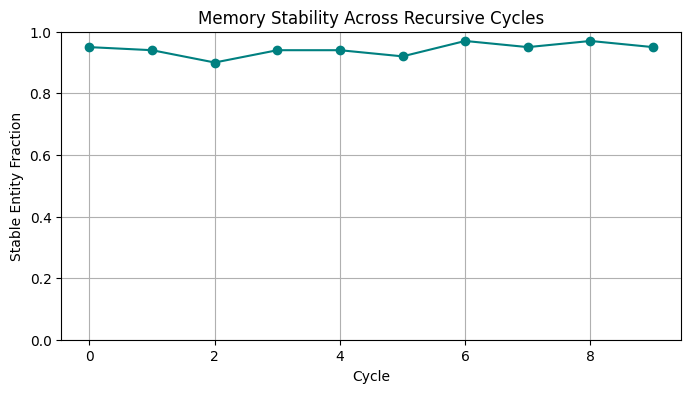

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
num_entities = 100
num_cycles = 10
memory_noise = 0.1  # How much distortion is introduced during recall
stability_threshold = 0.95  # Cosine similarity threshold for "stable" memory

# --- Initialize Entities ---
def initialize_entities(seed=42):
    np.random.seed(seed)
    return np.random.rand(num_entities, 2)  # 2D positions

# --- Memory Recall with Noise ---
def recall_memory(memory, noise_level):
    noise = np.random.normal(0, noise_level, memory.shape)
    return np.clip(memory + noise, 0, 1)

# --- Stability Metric ---
def compute_stability(original, recalled):
    dot = np.sum(original * recalled, axis=1)
    norm_orig = np.linalg.norm(original, axis=1)
    norm_recall = np.linalg.norm(recalled, axis=1)
    cosine_similarity = dot / (norm_orig * norm_recall + 1e-8)
    return np.mean(cosine_similarity > stability_threshold)

# --- Recursive Loop ---
def run_recursion():
    memory = initialize_entities()
    stability_scores = []

    for cycle in range(num_cycles):
        recalled = recall_memory(memory, memory_noise)
        stability = compute_stability(memory, recalled)
        stability_scores.append(stability)
        memory = recalled  # Feed forward for next recursion

    return stability_scores

# --- Visualization ---
def plot_stability(stability_scores):
    plt.figure(figsize=(8, 4))
    plt.plot(stability_scores, marker='o', color='teal')
    plt.title("Memory Stability Across Recursive Cycles")
    plt.xlabel("Cycle")
    plt.ylabel("Stable Entity Fraction")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

# --- Run ---
stability_scores = run_recursion()
plot_stability(stability_scores)
